In [215]:
# importamos las librerias necesarias
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
# Importamos el dataset para manejarlo como un DataFrame
df = pd.read_csv('airlinesatisfaction.csv')

#### https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [217]:
# Mostramos las primeras filas del DataFrame
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [218]:
# Obtenemos los nombres de las columnas del DataFrame
df.keys()

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [219]:
# Obtenemos los valores únicos de cada columna
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [220]:
# Eliminamos las columnas que no necesitamos del DataFrame
without_gender = df.drop(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness',  'Arrival Delay in Minutes',
'satisfaction' ], axis=1)

In [221]:
# Mostramos las primeras filas del DataFrame sin las columnas eliminadas
without_gender.head()

,Age,Flight Distance,Departure Delay in Minutes
0,52,160,50
1,36,2863,0
2,20,192,0
3,44,3377,0
4,49,1182,0


### Aplicamos la curva de Elbow

In [222]:
# Determinar el número de centroides o clusters que se probarán en el algoritmo K-Means
centers = range(1, 9)

In [223]:
clusters = [KMeans(n_clusters=center) for center in centers]

In [224]:
# Calculamos el score para cada número de clusters utilizando el algoritmo K-Means
scores = [model.fit(without_gender).score(without_gender) for model in clusters]

d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

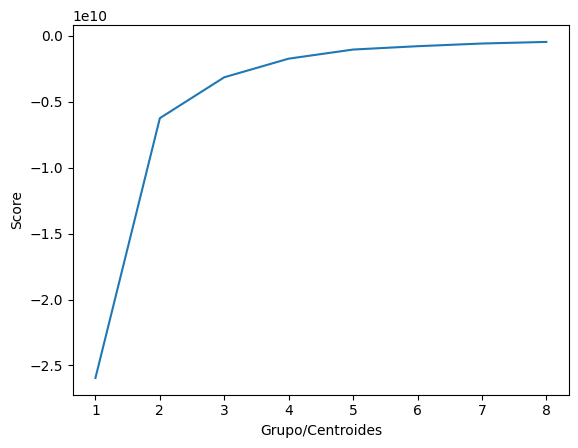

In [225]:
# Aplicamos la curva de Elbow para encontrar el número óptimo de clusters
plt.plot(centers, scores)
plt.xlabel('Grupo/Centroides')
plt.ylabel('Score')
plt.show()

In [226]:
# Inicializamos el modelo
k_means = KMeans(n_clusters=5)

In [227]:
# Entrenamos el modelo
k_means.fit(without_gender)

d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [228]:
# Obtenemos los centroides de los clusters encontrados por K-Means
k_means.cluster_centers_

array([[  39.30045406,  361.5835185 ,   13.82755289],
       [  42.15408805, 2509.7927673 ,   14.60314465],
       [  40.43651014, 1669.48846902,   13.36037788],
       [  43.8085213 , 3528.53784461,   14.25964912],
       [  37.28156474,  910.52911984,   15.40154722]])

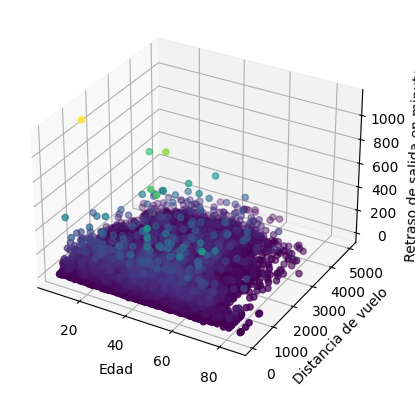

In [229]:
# Visualizaremos los datos de manera tridimensional
df_array = without_gender.to_numpy()
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
chart = axis.scatter(df_array[:, 0], df_array[:, 1], df_array[:, 2], c=df_array[:, 2])
centroids = axis.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], k_means.cluster_centers_[:, 2])
axis.set_xlabel("Edad")
axis.set_ylabel("Distancia de vuelo")
axis.set_zlabel("Retraso de salida en minutos")
plt.show()

In [230]:
# Obtenemos los centroides de los clusters encontrados por K-Means
k_means.cluster_centers_

array([[  39.30045406,  361.5835185 ,   13.82755289],
       [  42.15408805, 2509.7927673 ,   14.60314465],
       [  40.43651014, 1669.48846902,   13.36037788],
       [  43.8085213 , 3528.53784461,   14.25964912],
       [  37.28156474,  910.52911984,   15.40154722]])

In [231]:
flight_time_groups = [
    'Grupo Vuelo Corto',
    'Grupo Vuelo Medio',
    'Grupo Vuelo Largo',
    'Grupo Vuelo Intermedio'
    'Grupo Vuelo Eterno'
]

In [232]:
# Imprimimos los datos
age = 20
flight_distance = 1000
departure_delay = 10

predicted = k_means.predict([[age, flight_distance, departure_delay]])
print(f'Un cliente de {age} años, que viaja {flight_distance} millas y tiene un retraso de {departure_delay} minutos, pertenece al {flight_time_groups[predicted[0]]}')


d:\Algoritmica 2023\Practico 4 Algoritmica\practico4_env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


IndexError: list index out of range

In [ ]:
df['Flight Time Groups'] = k_means.labels_

In [ ]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Flight Time Groups
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,2,5,5,50,44.0,satisfied,2
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,3,4,5,0,0.0,satisfied,1
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,2
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,3,1,4,0,6.0,satisfied,4
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,4,2,4,0,20.0,satisfied,0
